<a href="https://colab.research.google.com/github/belislescott2/belislescott2/blob/main/Copy_of_Pandas_Times_Series_Data_Analysis_Meter_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data Analysis using Pandas

- Created by Clayton Miller - clayton@nus.edu.sg - miller.clayton@gmail.com

This notebook is an introduction to several key time-series functions available in the Pandas library. 

Several portions of the function explanations are from: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

## The Building Data Genome Project

For this set of videos, we will be using the Building Data Genome Project:

https://github.com/buds-lab/the-building-data-genome-project

![alt text](https://raw.githubusercontent.com/buds-lab/the-building-data-genome-project/master/figures/buildingdatagenome1.png)

This project is a set of 500+ time-series meter data from buildings -- check out the website which includes an overview of the data set, sources, and publications that use the data set. 

In this notebook, we will use some of the buildings from that data set to understand why Pandas was designed for time-series data from IoT networks

First, we will load the libraries and mount the drives as usual

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

Let's begin this demonstration of time-series data analysis by loading the data from a single building from the `Building Data Genome Project` -- this building has the name `Abilgail`

You can notice that this time there is a column in the data set called `timestamp`. If we load the DataFrame the usual way then this column will just be a string data type:


In [ ]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp") 
abigail

,Office_Abigail
timestamp,
2015-01-01 00:00:00,5.33
2015-01-01 01:00:00,5.41
2015-01-01 02:00:00,5.60
2015-01-01 03:00:00,6.50
2015-01-01 04:00:00,5.39
...,...
2015-12-31 19:00:00,7.29
2015-12-31 20:00:00,6.65
2015-12-31 21:00:00,0.80


In [ ]:
abigail.head()

,Office_Abigail
timestamp,
2015-01-01 00:00:00,5.33
2015-01-01 01:00:00,5.41
2015-01-01 02:00:00,5.60
2015-01-01 03:00:00,6.50
2015-01-01 04:00:00,5.39


In [ ]:
abigail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9+ KB


In [ ]:
abigail.index[0]

'2015-01-01 00:00:00'

## Setting the `timestamp` index to a *datetime* object 

Pandas has several very useful functions that we will cover in this notebook, but first we need to indicate to Pandas that the index is not just a regular string -- it has information related to date and time attributes including whether the day is **Monday** or **Tuesday** or whether that is a weekday or weekend. 

We can tell the `.read_csv()` function that it should **parse** the index and try to convert it into a *datetime* object. Let's see what happens when we do that.

In [ ]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp", parse_dates=True) 

In [ ]:
abigail.head()

,Office_Abigail
timestamp,
2015-01-01 00:00:00,5.33
2015-01-01 01:00:00,5.41
2015-01-01 02:00:00,5.60
2015-01-01 03:00:00,6.50
2015-01-01 04:00:00,5.39


In [ ]:
abigail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [ ]:
abigail.index[0]

Timestamp('2015-01-01 00:00:00')

## `Timestamp` object attributes

You will notice that the index is not what's known as a `DateTimeIndex` and each of the index items is a `Timestamp` object. This allows us to as the object things like what day of the week it is and other attributes. 

More info here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html


In [ ]:
abigail.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=8760, freq=None)

In [ ]:
abigail.index[0].month

1

In [ ]:
abigail.index[0].dayofweek

3

In [ ]:
abigail.index[0].week

1

In [ ]:
abigail.index[0].is_leap_year

False

In [ ]:
abigail.index[0].hour

0

# Plotting simple line charts of time-series data

The first thing we can do with the data is to explore it as a line chart. This gives us an understanding of the shape, frequency and potential for outliers. Data exploration is the first step in the analysis process.

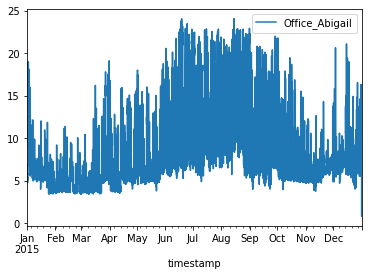

In [ ]:
abigail.plot()

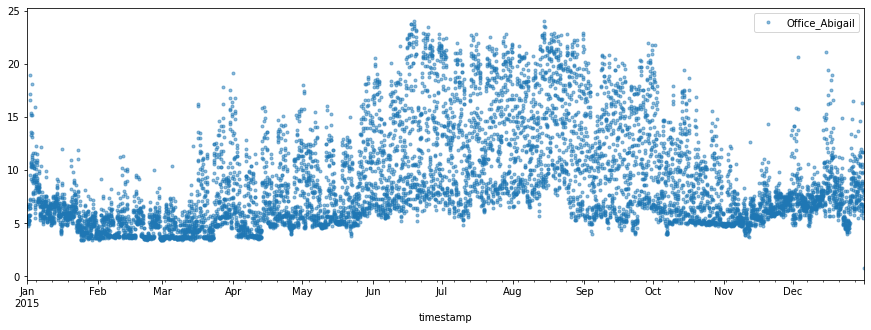

In [ ]:
abigail.plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 5))

# Resample the data to other frequencies

"It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we’re working with in this tutorial was downsampled from the original hourly time series. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s `resample()` method, which splits the DatetimeIndex into time bins and groups the data by time bin. The `resample()` method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as `mean()`, `median()`, `sum()`, etc., to the data group for each time bin." -- from: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/



In [ ]:
abigail.head()

We can first resample to daily data by using the `D` as an attribute in the `.resample()` function to indicate that we want *daily* data aggregation. We use the `.mean()` function to indicate that we want the function to take the average across each day's hourly readings to produce the aggregated value for the day

In [ ]:
abigail_daily = abigail.resample("D").mean()

In [ ]:
abigail_daily.head()

,Office_Abigail
timestamp,
2015-01-01,5.533750
2015-01-02,10.226771
2015-01-03,10.439167
2015-01-04,9.073333
2015-01-05,8.677500


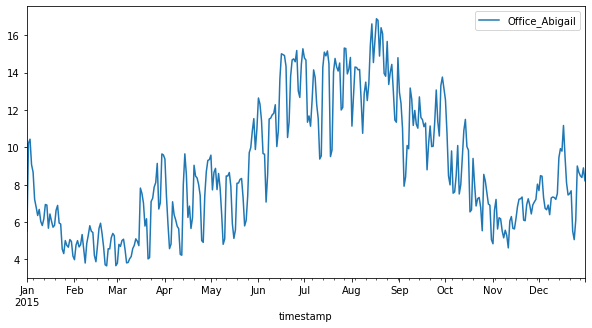

In [ ]:
abigail_daily.plot(figsize=(10,5))

We can do the same to create *monthly* data and other aggregations

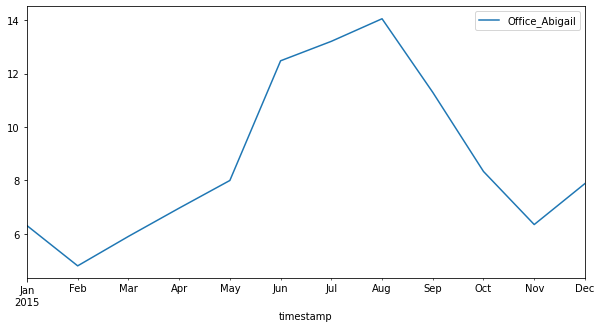

In [ ]:
abigail_daily.resample("M").mean().plot(figsize=(10,5))

## Frequencies 

The Pandas Library has dozens of **frequencies** that can be used to resample data -- the detailed list is here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


# Truncating Time-Series Data

The truncate function allows us to slice the data into smaller dataframes according to a time range

Pandas DataFrame.truncate() function is used to truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.

https://www.geeksforgeeks.org/python-pandas-dataframe-truncate/

In [ ]:
abigail_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
abigail_daily = abigail.resample("D").mean()
abigail_daily_june = abigail_daily.truncate(before = '2015-06-01', after='2015-07-01')

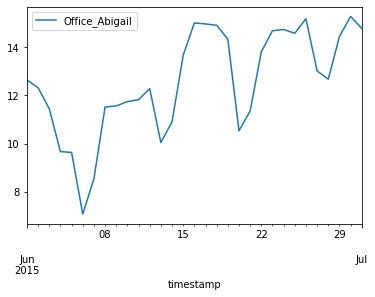

In [ ]:
abigail_daily_june.plot()

# Trends Analysis and Rolling Windows

"Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales." - https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [ ]:
abigail.rolling(window=500, center=True, min_periods=500).mean().plot()

# Analysis of a large number of buildings at once

Let's look at a larger group of buildings to understand how these functions can enhanced the analysis of a large number of buildings

In [ ]:
os.listdir()

['Office_Abigail.gsheet',
 'Office_Al.csv',
 'Office_Andrea.csv',
 'Office_Annika.csv',
 'Office_Angelica.csv',
 'Office_Angelo.csv',
 'Office_Angelina.csv',
 'Office_Ashanti.csv',
 'Office_Allyson.csv',
 'Office_Alyson.csv',
 'Office_Aliyah.csv',
 'Office_Anastasia.csv',
 'Office_Abbey.csv',
 'Office_Abigail.csv',
 'Office_Alannah.csv',
 'Office_Amelia.csv',
 'Office_Amelie.csv',
 'Office_Aubrey.csv',
 'Office_Autumn.csv',
 'Office_Asher.csv',
 'Office_Penny.csv',
 'Office_Cecelia.csv',
 'Office_Phebian.csv',
 'Office_Ayden.csv',
 'Office_Pam.csv',
 'Office_Ayesha.csv',
 'Office_Benjamin.csv',
 'Office_Ava.csv',
 'PrimClass_Angel.csv',
 'Office_Benthe.csv',
 'Office_Bianca.csv',
 'Office_Caleb.csv',
 'Office_Bryon.csv',
 'PrimClass_Eoghan.csv',
 'PrimClass_Esmeralda.csv',
 'Office_Bobbi.csv',
 'Office_Brian.csv',
 'Office_Carissa.csv',
 'Office_Carolina.csv',
 'Office_Catherine.csv',
 'Office_Cameron.csv',
 'Office_Charles.csv',
 'Office_Clinton.csv',
 'Office_Clarissa.csv',
 'Office_

Using that list, let's take all the buildings that have a time range of 2015

In [ ]:
list_of_buildings = ['UnivClass_Andy.csv',
'Office_Abbey.csv',
'Office_Alannah.csv',
'PrimClass_Angel.csv',
'Office_Penny.csv',
'Office_Pam.csv',
'UnivClass_Craig.csv',
'UnivLab_Allison.csv',
'Office_Amelia.csv',
'Office_Aubrey.csv',
'Office_Cecelia.csv',
'UnivClass_Conor.csv',
'Office_Autumn.csv',
'Office_Abigail.csv',
'Office_Amelie.csv',
'UnivClass_Alfredo.csv',
'Office_Phebian.csv',
'UnivLab_Adrian.csv',
'UnivDorm_Curtis.csv',
'UnivLab_Angie.csv',
'UnivClass_Amya.csv',
'UnivDorm_Cian.csv',
'UnivClass_Ciara.csv',
'UnivLab_Audra.csv',
'UnivLab_Ciel.csv',
'UnivLab_Cesar.csv']

In [ ]:
import numpy as np
import pandas as pd

all_data_list = []
for buildingname in list_of_buildings:
  df = pd.read_csv(buildingname, index_col = "timestamp", parse_dates=True) 
  df = df.resample("H").mean()
  all_data_list.append(df)
all_data = pd.concat(all_data_list, axis=1)



NameError: ignored

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UnivClass_Andy     8760 non-null   float64
 1   Office_Abbey       8760 non-null   float64
 2   Office_Alannah     8760 non-null   float64
 3   PrimClass_Angel    8760 non-null   float64
 4   Office_Penny       8759 non-null   float64
 5   Office_Pam         8759 non-null   float64
 6   UnivClass_Craig    8759 non-null   float64
 7   UnivLab_Allison    8760 non-null   float64
 8   Office_Amelia      8760 non-null   float64
 9   Office_Aubrey      8760 non-null   float64
 10  Office_Cecelia     8759 non-null   float64
 11  UnivClass_Conor    8759 non-null   float64
 12  Office_Autumn      8760 non-null   float64
 13  Office_Abigail     8760 non-null   float64
 14  Office_Amelie      8760 non-null   float64
 15  UnivClass_Alfredo  8760 non-

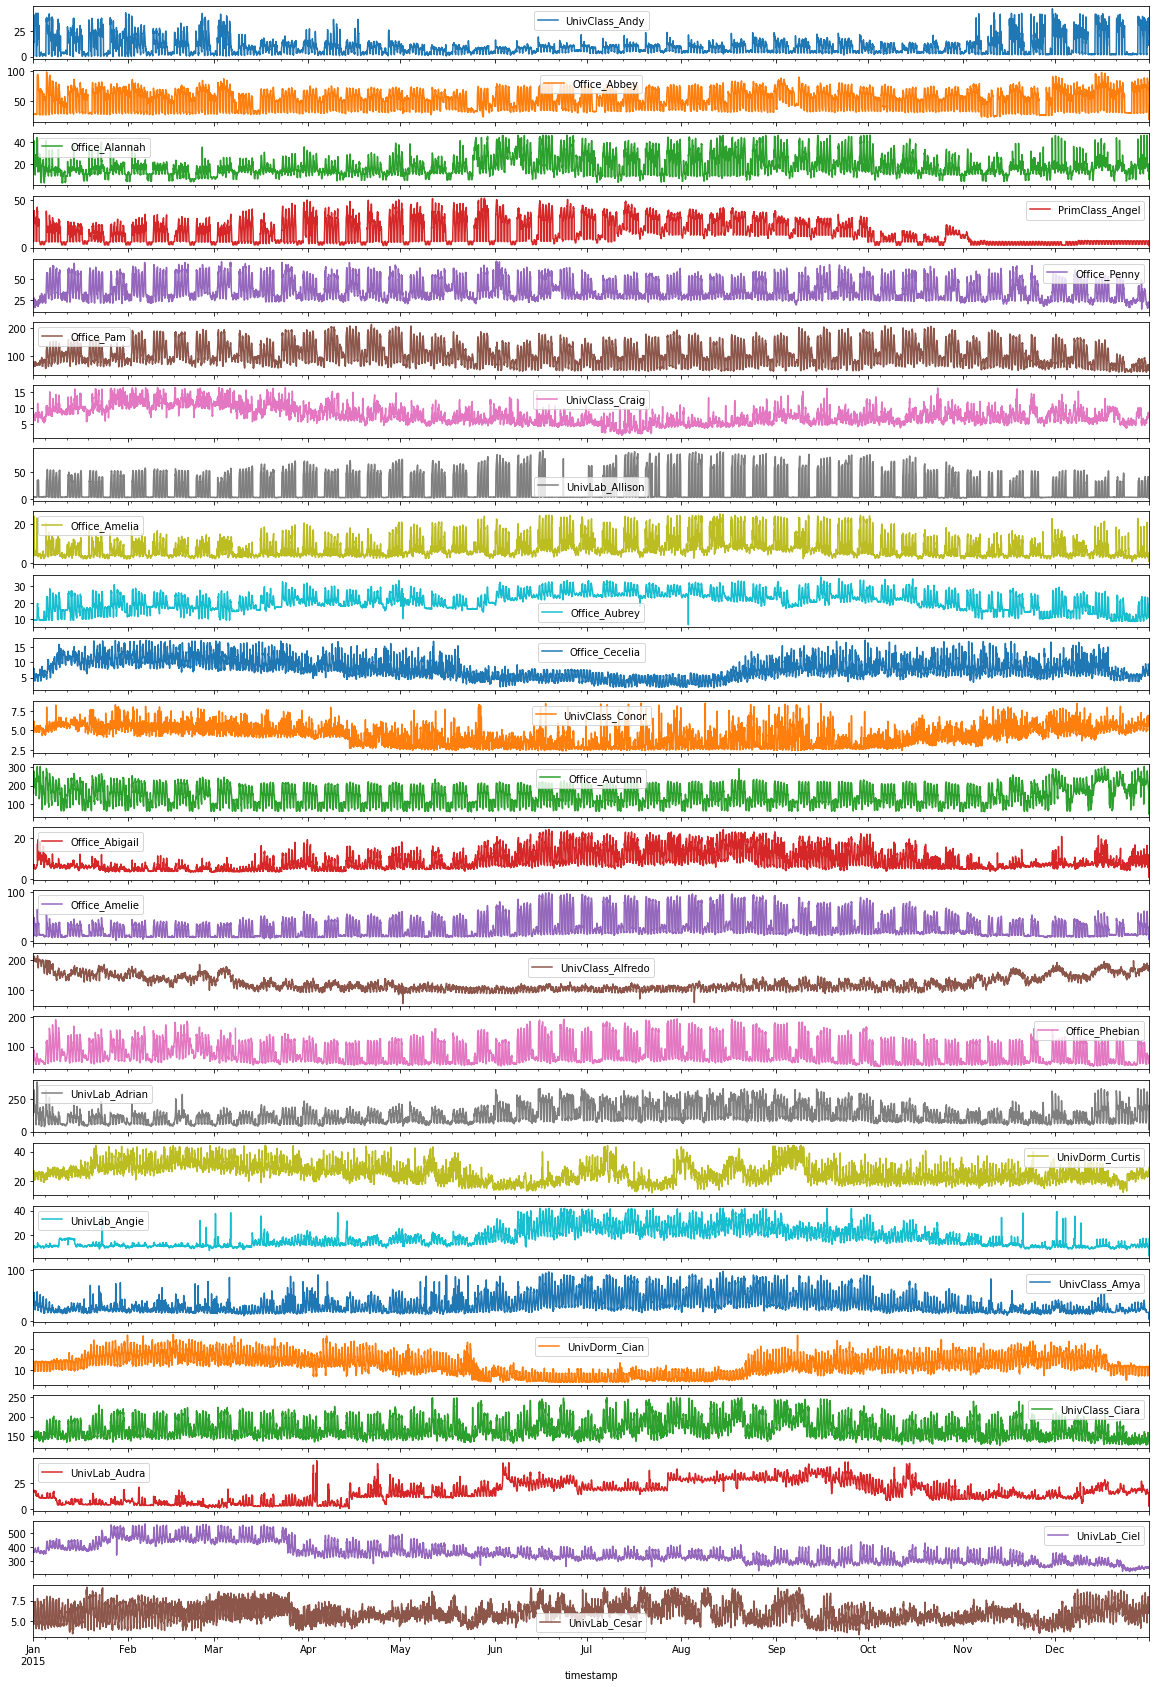

In [ ]:
all_data.plot(figsize=(20,30), subplots=True);

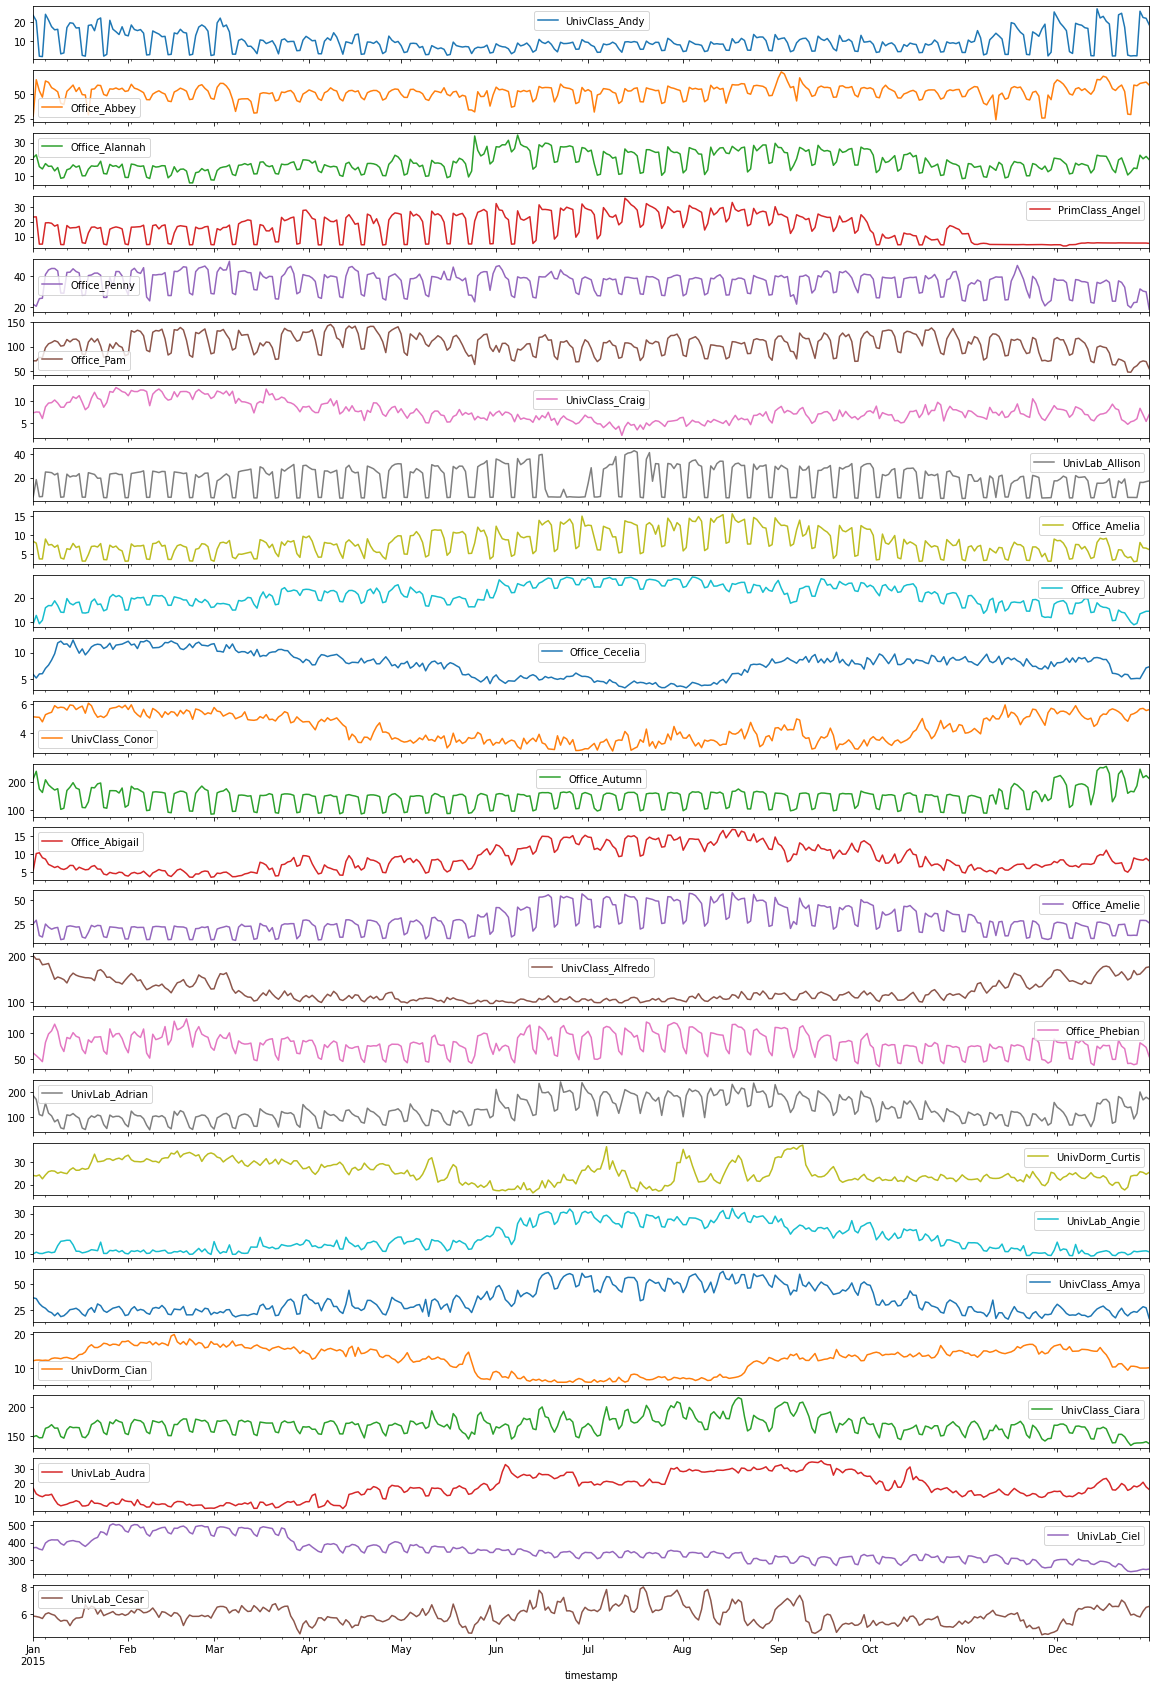

In [ ]:
all_data.resample("D").mean().plot(figsize=(20,30), subplots=True);

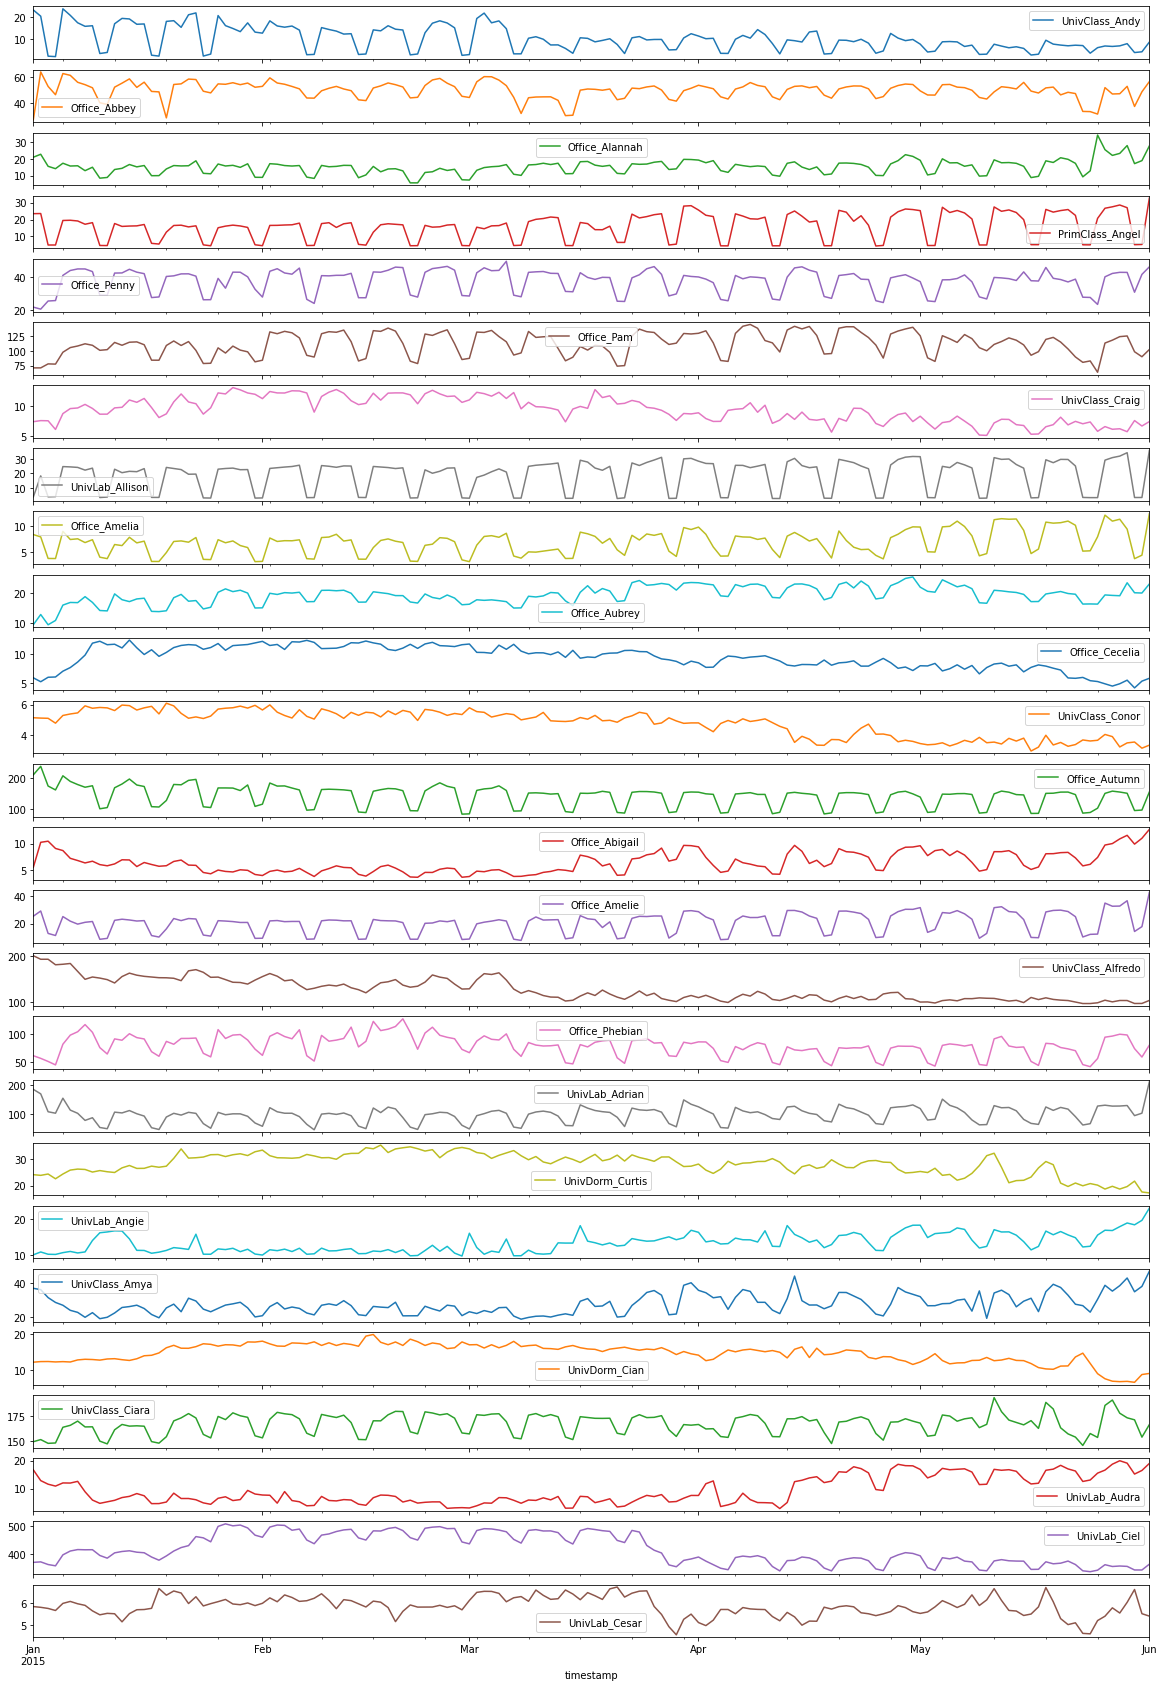

In [ ]:
all_data.resample("D").mean().truncate(after='2015-06-01').plot(figsize=(20,30), subplots=True);

## Filter columns by query

Let's just look at the *office* buildings by filtering the columns based on name

In [ ]:
all_data.columns[all_data.columns.str.contains("Office")]

Index(['Office_Abbey', 'Office_Alannah', 'Office_Penny', 'Office_Pam',
       'Office_Amelia', 'Office_Aubrey', 'Office_Cecelia', 'Office_Autumn',
       'Office_Abigail', 'Office_Amelie', 'Office_Phebian'],
      dtype='object')

In [ ]:
all_data[all_data.columns[all_data.columns.str.contains("Office")]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abbey    8760 non-null   float64
 1   Office_Alannah  8760 non-null   float64
 2   Office_Penny    8759 non-null   float64
 3   Office_Pam      8759 non-null   float64
 4   Office_Amelia   8760 non-null   float64
 5   Office_Aubrey   8760 non-null   float64
 6   Office_Cecelia  8759 non-null   float64
 7   Office_Autumn   8760 non-null   float64
 8   Office_Abigail  8760 non-null   float64
 9   Office_Amelie   8760 non-null   float64
 10  Office_Phebian  8759 non-null   float64
dtypes: float64(11)
memory usage: 1.1 MB


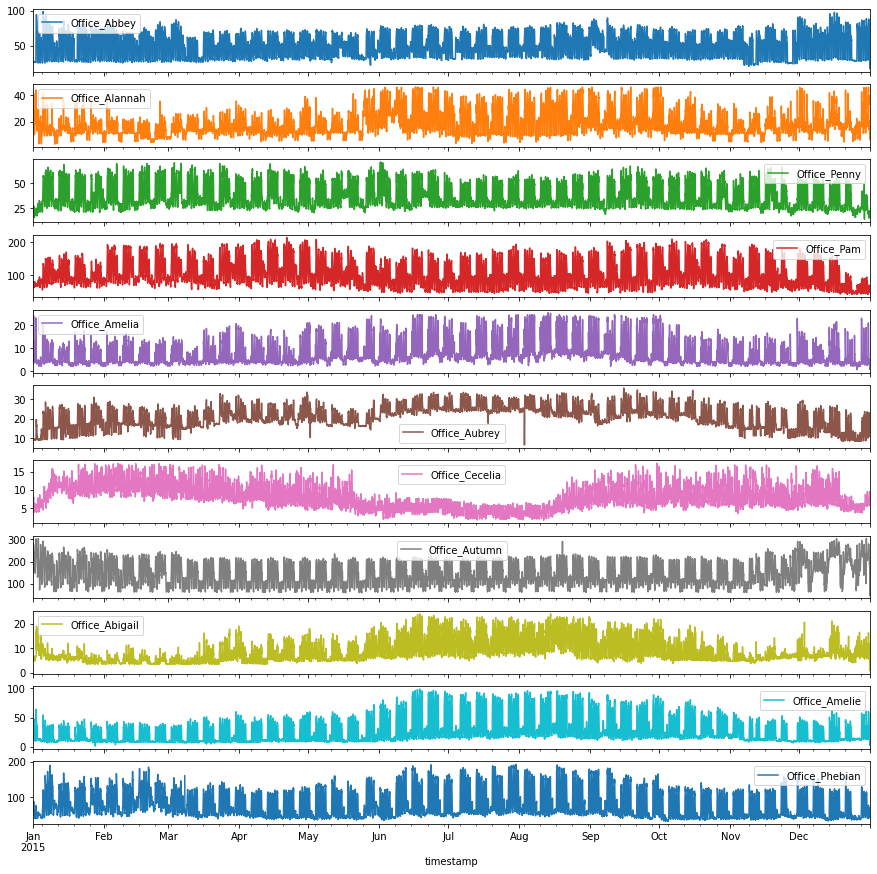

In [ ]:
all_data[all_data.columns[all_data.columns.str.contains("Office")]].plot(figsize=(15,15), subplots=True);